In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [4]:
url = 'https://raw.githubusercontent.com/npukujui11/520-fc/master/race_bar_sheet.csv'
df = pd.read_csv(url, usecols=['name','group','year','value'])
df.head(3)

,name,group,year,value
0,北纬,1,7.09,1
1,北纬,1,7.12,2
2,北纬,1,7.16,3


In [6]:
colors = dict(zip(
    ["北纬", "阿哲", "阿申", "昊子", "风光", "周末", "刘佳", "锋哥", "开泉", "表弟", "阿洵", "大又", "阿源", "杰伦", "侯哥"], 
    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50", "#fffcad", "#add9ff", "#adb0ff", "d3adff", "#adffba", "#e8adff", "#d9ffad", "#ffd3ad"]
))
group_lk = df.set_index('name')['group'].to_dict()

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = df[df['year'].eq(12.3)].sort_values(by='value', ascending=True).tail(10)
ax.clear()
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])

KeyError: 10

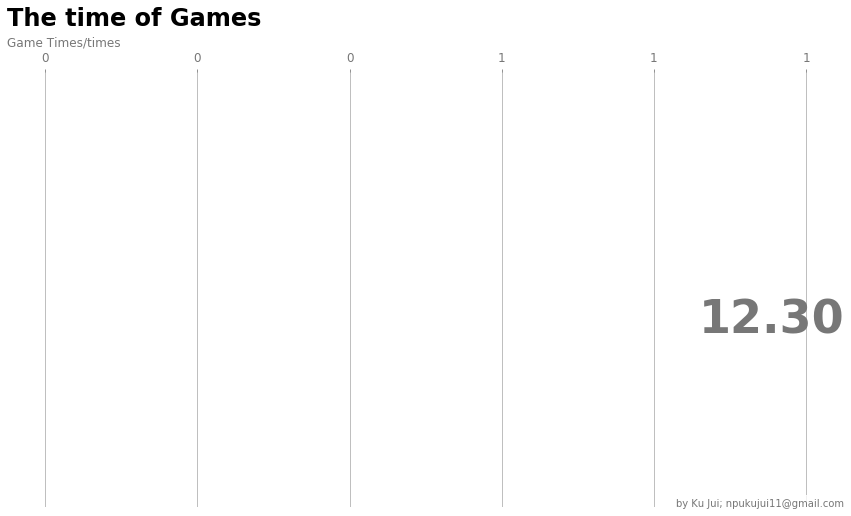

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_date):
    dff = df[df['DATE_Value'].eq(current_date)].sort_values(by='TIME', ascending=True).tail(1)
    ax.clear()
    ax.barh(dff['NAME'], dff['TIME'], color=[colors[group_lk[x]] for x in dff['NAME']])
    dx = dff['TIME'].max() / 3
    for i, (TIME, NAME) in enumerate(zip(dff['TIME'], dff['NAME'])):
        ax.text(TIME-dx, i,     NAME,           size=14, weight=600, ha='right', va='bottom')
        ax.text(TIME-dx, i-.25, group_lk[NAME], size=10, color='#444444', ha='right', va='baseline')
        ax.text(TIME+dx, i,     f'{TIME:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Game Times/times', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'The time of Games',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by Ku Jui; npukujui11@gmail.com', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

draw_barchart("12.30")

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(7.90,12.30))
HTML(animator.to_jshtml())

TypeError: 'float' object cannot be interpreted as an integer